In [1]:
# 1.0 Call libraries

import pandas as pd
import numpy as np
# 1.2 For OS related operations
import os
import matplotlib.pyplot as plt

# 1.3 Class for applying multiple data transformation jobs
from sklearn.compose import ColumnTransformer as ct

# 1.4 Scale numeric data
from sklearn.preprocessing import StandardScaler as ss

# 1.5 One hot encode data--Convert to dummy
from sklearn.preprocessing import OneHotEncoder as ohe

# 1.6 for data splitting
from sklearn.model_selection import train_test_split

# 1.7 Modeler
from sklearn.tree import DecisionTreeClassifier as dt
###################### Random Forest ############################
from sklearn.ensemble import RandomForestClassifier 
#use RandomForestRegressor for regression problem
from sklearn.metrics import accuracy_score


In [2]:
#importing datasets  
df=pd.read_csv("C:/Users/kdipu/OneDrive/Desktop/MLP/train_u6lujuX_CVtuZ9i (1).csv")

In [3]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.loc[df['Loan_Status'] =='Y', 'Loan_approval'] = 1
df.loc[df['Loan_Status'] =='N', 'Loan_approval'] = 0
df.loc[df['Education'] =='Graduate', 'Edu'] = 1
df.loc[df['Education'] =='Not Graduate', 'Edu'] = 0
df.loc[df['Self_Employed'] =='No', 'Self_Emp'] = 1
df.loc[df['Self_Employed'] =='Yes', 'Self_Emp'] = 0
df.head()
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_approval,Edu,Self_Emp
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,1.0,1.0,1.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,1.0,1.0,1.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,1.0,1.0,1.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,1.0,1.0,1.0
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N,0.0,1.0,0.0


In [6]:
#Making a new column based on summation of salaries of applicants

df['Total Income'] = (df['ApplicantIncome'] + df['CoapplicantIncome'])

##Handling the missing data with 0 value
df = df.fillna(0)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_approval,Edu,Self_Emp,Total Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y,1.0,1.0,1.0,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.0,1.0,1.0,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1.0,1.0,0.0,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1.0,0.0,1.0,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1.0,1.0,1.0,6000.0


In [7]:
feature_cols = ['Loan_approval', 'Edu', 'Self_Emp']
x = df[feature_cols] # Features
y = df.Loan_Status # Target variable

In [8]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [9]:
#Feature Scaling

sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

classifier = dt(criterion = 'entropy', random_state = 0)
#classifier = dt(criterion = 'entropy', random_state = 0, max_depth=4)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
#Y_pred, Y_test

In [11]:
print("Predicted Values : ",Y_pred[1:50])

Predicted Values :  ['Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'Y']


In [12]:
print("Accuracy:",accuracy_score(Y_test, Y_pred))


Accuracy: 1.0


[Text(334.8, 285.39, 'X[0] <= -0.423\nentropy = 0.888\nsamples = 429\nvalue = [131, 298]'),
 Text(167.4, 95.13, 'entropy = 0.0\nsamples = 131\nvalue = [131, 0]'),
 Text(502.20000000000005, 95.13, 'entropy = 0.0\nsamples = 298\nvalue = [0, 298]')]

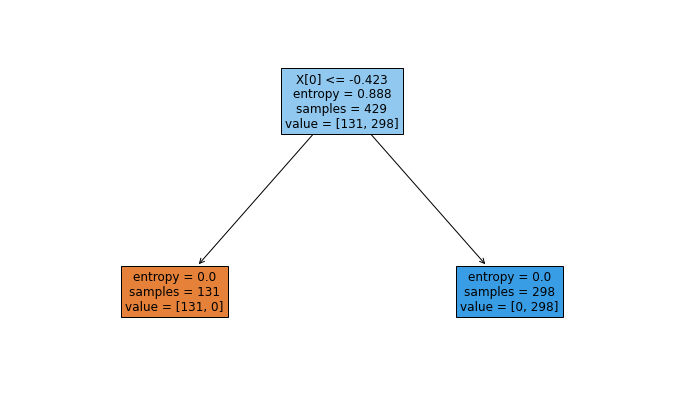

In [13]:
from sklearn import tree
plt.figure(figsize=(12,7))
tree.plot_tree(classifier, filled=True, fontsize=12)

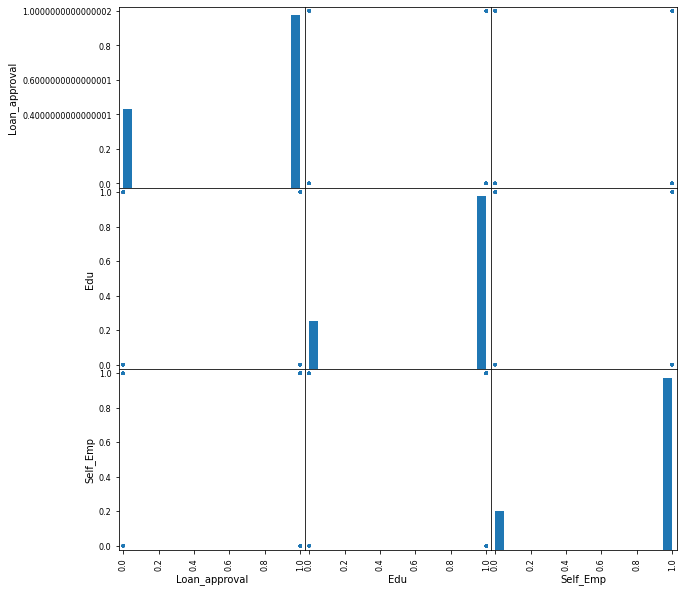

In [14]:
X_dataframe = x

grr = pd.plotting.scatter_matrix(X_dataframe, figsize=(10, 10), marker='o', hist_kwds={'bins': 20}, s=10, alpha=.8)

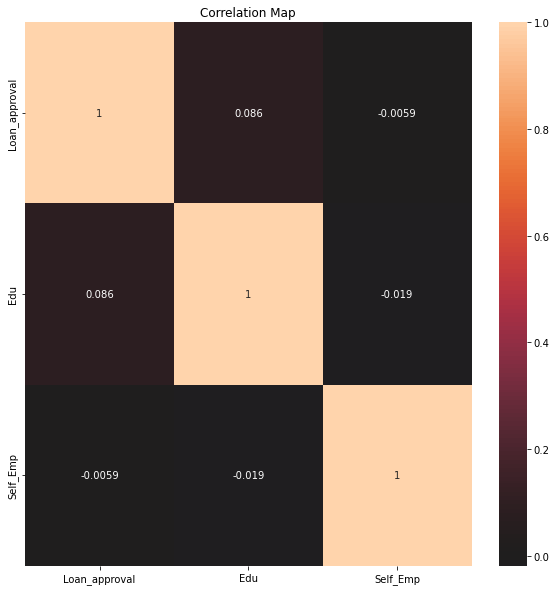

In [15]:
#Plotting the Correlation Map

import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(x.corr(), center=0, annot=True)
plt.title("Correlation Map")
plt.show()

In [16]:
print("Accuracy:",accuracy_score(Y_test, Y_pred))

Accuracy: 1.0


In [17]:
#For the given dataset loan approval, 

#Decision tree model yields better accuracy compared to KNN regressor model
